### Assignment 5
#### Name: Khalate Shubham
#### Class: AIDS A
#### Rollno: 23107062
#### Batch: C

### Linear Regression 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/admin1/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.shape

(506, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
df.isnull()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [41]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [43]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [15]:
df.notnull()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,True,True,True,True,True,True,True,True,True,True,True,True,True,True
502,True,True,True,True,True,True,True,True,True,True,True,True,True,True
503,True,True,True,True,True,True,True,True,True,True,True,True,True,True
504,True,True,True,True,True,True,True,True,True,True,True,True,True,True


<Axes: xlabel='age', ylabel='medv'>

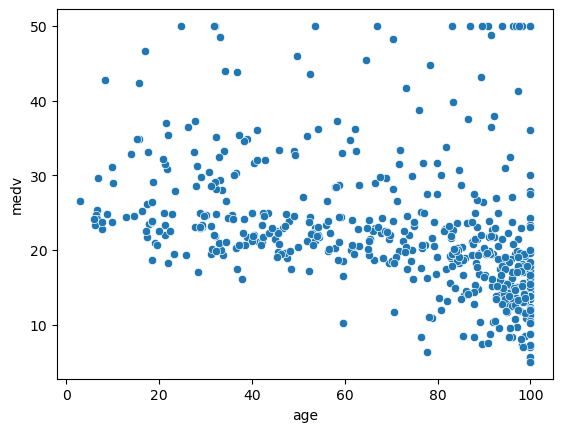

In [17]:
sns.scatterplot(x=df['age'],y=df['medv'])

In [19]:
x=df['medv'].drop
y=df['medv']

In [21]:
x

<bound method Series.drop of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64>

In [23]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [25]:
from sklearn import linear_model

In [27]:
lr=linear_model.LinearRegression()
lr

LinearRegression()

In [33]:
x=df.drop(columns=['medv'])
y=df['medv']

In [35]:
from sklearn.model_selection import train_test_split

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=5)

In [99]:
len(x_train)

404

In [45]:
len(y_test)

102

In [47]:
X_cleaned = x.dropna()
y_cleaned = y[X_cleaned.index] 

In [49]:
lr.fit(x_test,y_test)

LinearRegression()

In [51]:
y_predict=lr.predict(x_test)

In [53]:
y_predict

array([38.6519417 , 29.30271169, 26.47847516,  8.03513159, 37.42476358,
       10.78384061, 27.22276743, 30.21226213, 26.61253562, 21.06652464,
       34.02779035, 20.21309397, 21.71723439, 33.40530263, 27.62503723,
       16.47311571,  4.98046603, 16.03843732, 14.40028301, 18.32973666,
        7.2078973 , 19.95611372, 40.62816672, 24.36936464, 33.29161476,
       13.46962143, 23.79116653, 22.67376479, 21.5233983 , 21.23433839,
       20.2741073 , 10.42265123, 16.56437975, 25.66102109, 28.75403451,
       19.66675985, 28.81834008, 13.36087535, 44.14506966, 32.54607535,
       18.5855062 ,  8.45539158, 28.06191383, 12.75079081, 28.17291196,
       30.48034899,  4.63763795, 21.93115392, 21.31022511, 17.76197326,
       20.14192739, 20.33332662, 23.87349206, 16.79357584, 17.43706481,
       23.77962221, 37.77957524, 17.22313246, 29.70530794, 22.13612898,
       19.92467917, 24.32205673, 14.97385835, 32.11376975, 18.1217244 ,
       13.19370126, 20.76593993, 25.11864473, 21.92814514, 17.86

In [158]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_test, y_test)


LinearRegression()

In [160]:
lr.fit(x_test,y_test)

LinearRegression()

In [162]:
x_predict=lr.predict(x_test)

In [121]:
test_score = model.score(x_test, y_test)


In [123]:
print("Accuracy score:", test_score)

Accuracy score: 0.8177826690284403


In [166]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,x_predict)
mse

14.266499786743381

In [168]:
r2=r2_score(y_test,x_predict)
r2

0.8177826690284403

In [170]:
mae=mean_absolute_error(y_test,x_predict)
mae

2.8858058614979654

In [201]:
import matplotlib.pyplot as plt

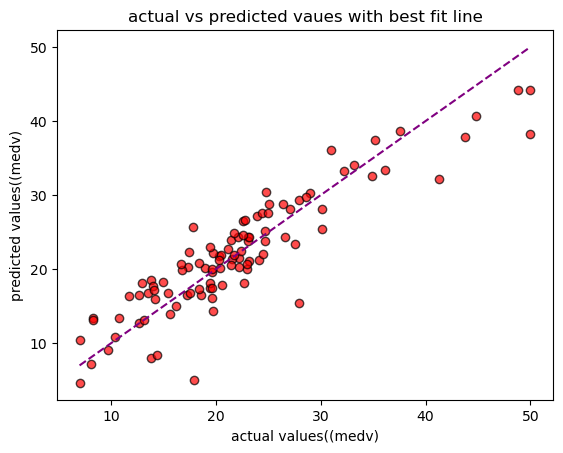

In [207]:
plt.scatter(y_test,x_predict,color='red',edgecolor='k',alpha=0.7)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='purple',linestyle="--")
plt.xlabel("actual values((medv)")
plt.ylabel("predicted values((medv)")
plt.title("actual vs predicted vaues with best fit line")
plt.show()
